In [2]:
import numpy
from numpy import random
#matplotlib inline
import matplotlib.pyplot as plt
## pyplot will let you display your results

In [9]:
sum(numpy.cumsum([1,2,3])<3.4)

2

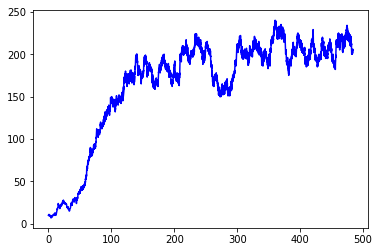

In [92]:
#testing testing lols

##SIS model

Population=1000;
recoveryRate=1/10;
InfectionRate= 1/(Population*8);


NumberOfSteps=16000;

randomNumbers=random.rand(NumberOfSteps)
randomExponentials=random.exponential(1,NumberOfSteps)

currentSteps=0;
currentState= numpy.asarray([10.0,Population-10.0]);
PositionArray= numpy.zeros(NumberOfSteps)
stepsArray=numpy.zeros(NumberOfSteps)
currentTime=0;


ActionMatrix= numpy.asarray([[-1,1],[1,-1]]);

##Here we have a basic Gillespie style loop.
while currentSteps<NumberOfSteps:
    
    Rates=[currentState[0]*recoveryRate, InfectionRate*currentState[0]*(Population-currentState[0])]
    if(sum(Rates)==0):
        break
    stepsArray[currentSteps]=currentTime;
    PositionArray[currentSteps]=currentState[0];
    
    currentTime+= randomExponentials[currentSteps]/sum(Rates)
    ActionIndex = sum(randomNumbers[currentSteps]*sum(Rates)>numpy.cumsum(Rates))
    currentState=currentState+ActionMatrix[ActionIndex];
    currentSteps=currentSteps+1;


##Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(stepsArray,PositionArray,'-b')




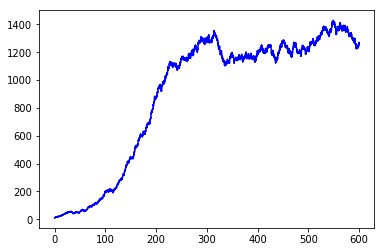

In [93]:
#testing testing lols

##SIS model

Population=6000;
recoveryRate=1/10;
InfectionRate= 1/(Population*8);


NumberOfSteps=6000;

randomNumbers=random.rand(NumberOfSteps)
randomExponentials=random.exponential(1,NumberOfSteps)
randomNormals=random.randn(2,NumberOfSteps)

currentSteps=0;
currentState= numpy.asarray([10.0,Population-10.0]);
PositionArray= numpy.zeros(NumberOfSteps)
stepsArray=numpy.zeros(NumberOfSteps)
currentTime=0;

ActionMatrix= numpy.asarray([[-1,1],[1,-1]]);
dt=0.1;

while currentSteps<NumberOfSteps:
    
    Rates=[currentState[0]*recoveryRate, InfectionRate*currentState[0]*(Population-currentState[0])]
    if(currentState[0]<=0):
        currentState[0]=0;
        stepsArray[currentSteps]=currentTime;
        PositionArray[currentSteps]=currentState[0];
        break
    stepsArray[currentSteps]=currentTime;
    PositionArray[currentSteps]=currentState[0];
    
    currentTime+= dt;
    index=0
    while index<2:
        numberEvents=(randomNormals[index][currentSteps])*numpy.math.sqrt(Rates[index]*dt) +Rates[index]*dt
        currentState= currentState+ActionMatrix[index]*numberEvents;
        index=index+1
    currentSteps+=1


##Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(stepsArray,PositionArray,'-b')




In [57]:
randomNormals=random.randn(2,NumberOfSteps)
print(randomNormals)

[[ 2.82416494  0.36358113  0.47885088 ...  0.75810799  0.63606778
  -0.95803487]
 [ 0.23967686 -1.40080168 -0.3630813  ... -1.02728909  0.57687217
  -0.56849817]]
